# House price analysis (EDA + Insight)

In this jupyter notebook, we will explore the customer base to understand the overall dataset. For that, we will Get the data ready for visualizations and then make the Exploratory Data Analysis using visualizations to get insights.

Steps:

- Get the data ready for visualizations
<br>a. Clean the data
<br>b. Create new features
<br>c. Get the data overview
<br>d. Remove outliers

- Exploratory Data Analysis
<br>a. Understand Each Variable
<br>b. Looking for correlations

- Building Model
<br>a. selecting algorithm according to RMSE value
<br>b. building model with selected algorithm


In [1]:
#IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as ydp
import plotly.express as px

In [2]:
#IMPORTING DATASET:
df=pd.read_csv(r"datas/house_price.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Full names of Dataset columns:
~~~
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
~~~

In [3]:
#EXPLORING DATA:
print("1.",df.shape)
print("2.",df.ndim)
print("3.",df.size)
print("4.",df.dtypes)


1. (1460, 81)
2. 2
3. 118260
4. Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [4]:
#general information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#statistical summary of the dataset:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#DATA CLEANING:
df.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [10]:
df.isnull().sum().tail(30)


BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [11]:
#copying the dataset:
dfc=df.copy()

In [12]:
#droping the columns which have more than 1100 null values:
for clm in df.columns:
    if dfc[clm].isnull().sum()>1100:
        dfc.drop(clm,axis=1,inplace=True)
dfc

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
#filling the null values with the mean of the columns:

dfc.fillna(dfc.mean(),inplace=True)
dfc.isnull().sum().head(40)

C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19916\3866539001.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc.fillna(dfc.mean(),inplace=True)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [14]:
#average price of the houses base on the neighborhood:

df=pd.DataFrame(dfc)
avg_price=pd.DataFrame(df.groupby("Neighborhood")["SalePrice"].mean())
avg_price

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [15]:
# building a bar plot to show the average price of the houses base on the neighborhood:(with plotly)
snc=px.bar(avg_price,x=avg_price.index,y="SalePrice",title="Average Price of the Houses base on the Neighborhood",
           color="SalePrice",template="plotly_dark")
snc.show()

In [16]:
#building histogram to show how many houses sold for years.(with seaborn)

sales=px.histogram(df,x="YrSold",title="How many houses sold for years",color="YrSold",opacity=0.8,
                   barmode="group",labels={"YrSold":"Years"},template="plotly_dark",width=800,height=400);
sales.show()



In [17]:
#correlation between sale price and quality of the house:
snc=px.scatter(df,x="SalePrice",y="OverallQual",title="Correlation between Sale Price and Class of the House",
               labels={"SalePrice":"Sale Price","OverallQual":"Quality of the House"},template="plotly_dark")
snc.show()

In [18]:
#correlation between area of the house and sale price:
snc=px.scatter(df,x="SalePrice",y="GrLivArea",title="Correlation between Sale Price and Area of the House",
               labels={"SalePrice":"Sale Price","GrLivArea":"Area of the House"})
snc.show()

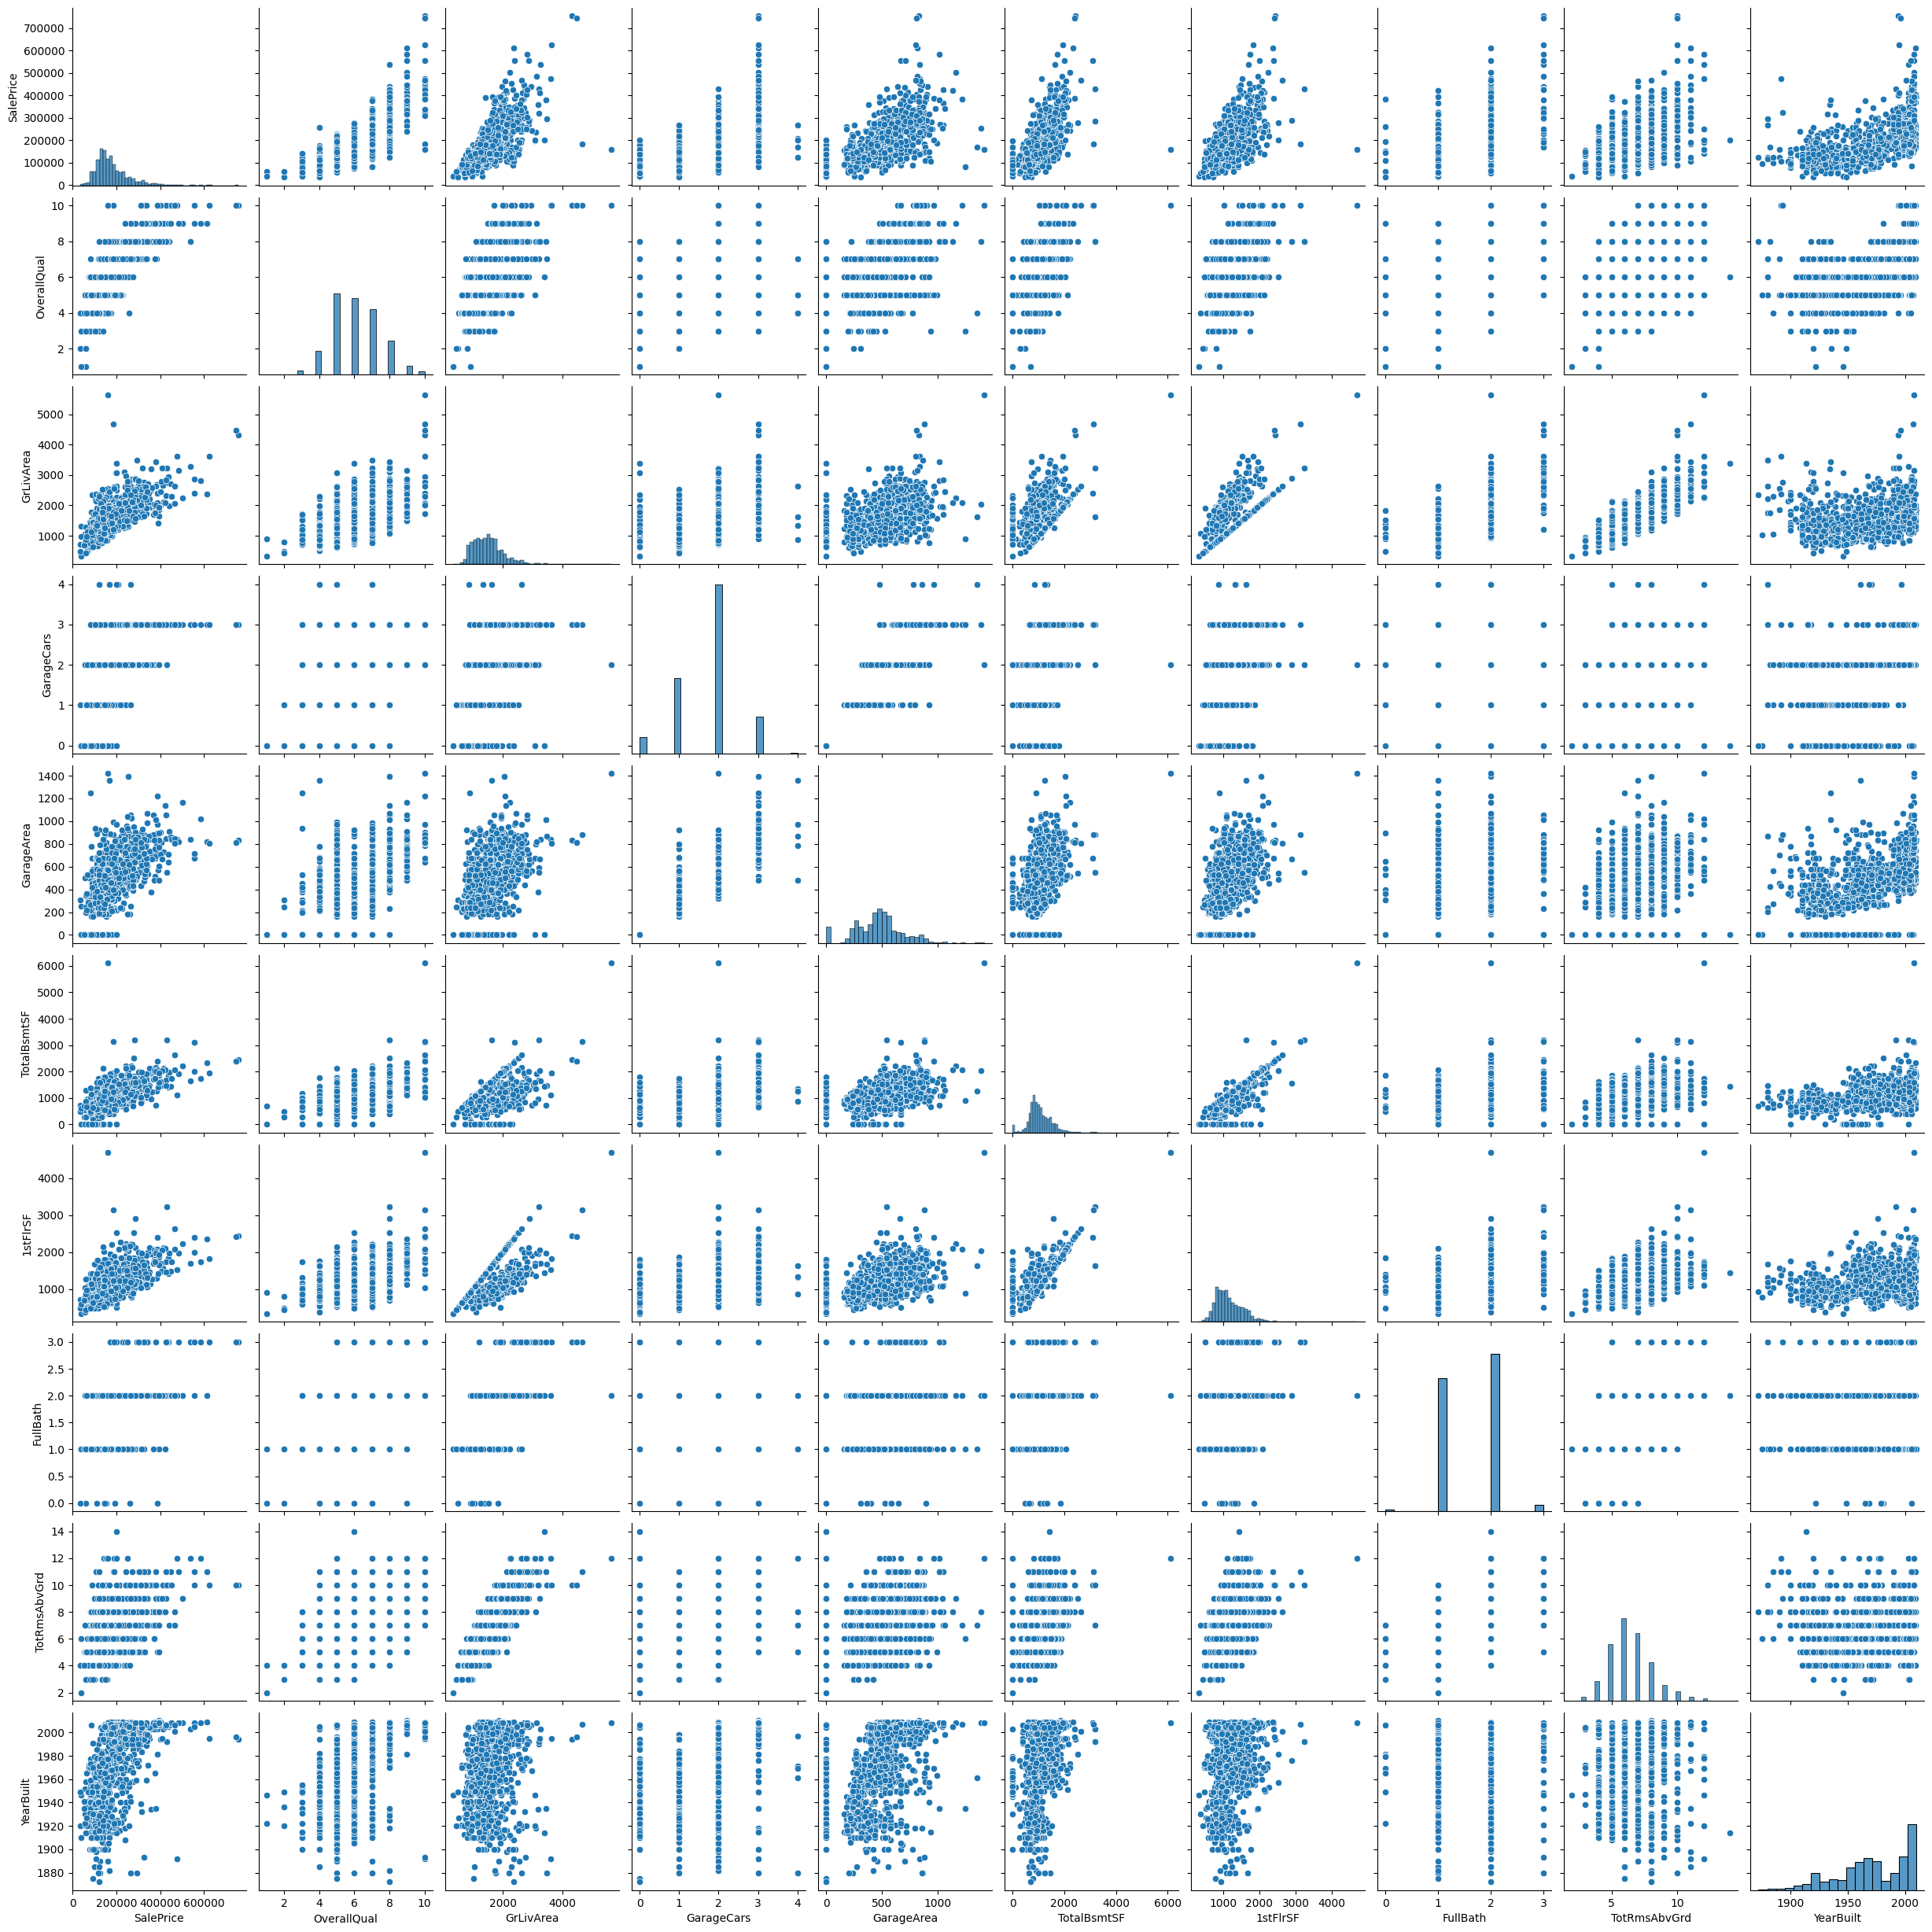

In [19]:
#correlation between on features:
snc=sns.pairplot(df[["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt"]]);


In [39]:
#plot the distribution for all the numerical features:

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num=df_num.drop(["Id"],axis=1)
df_num.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000.0


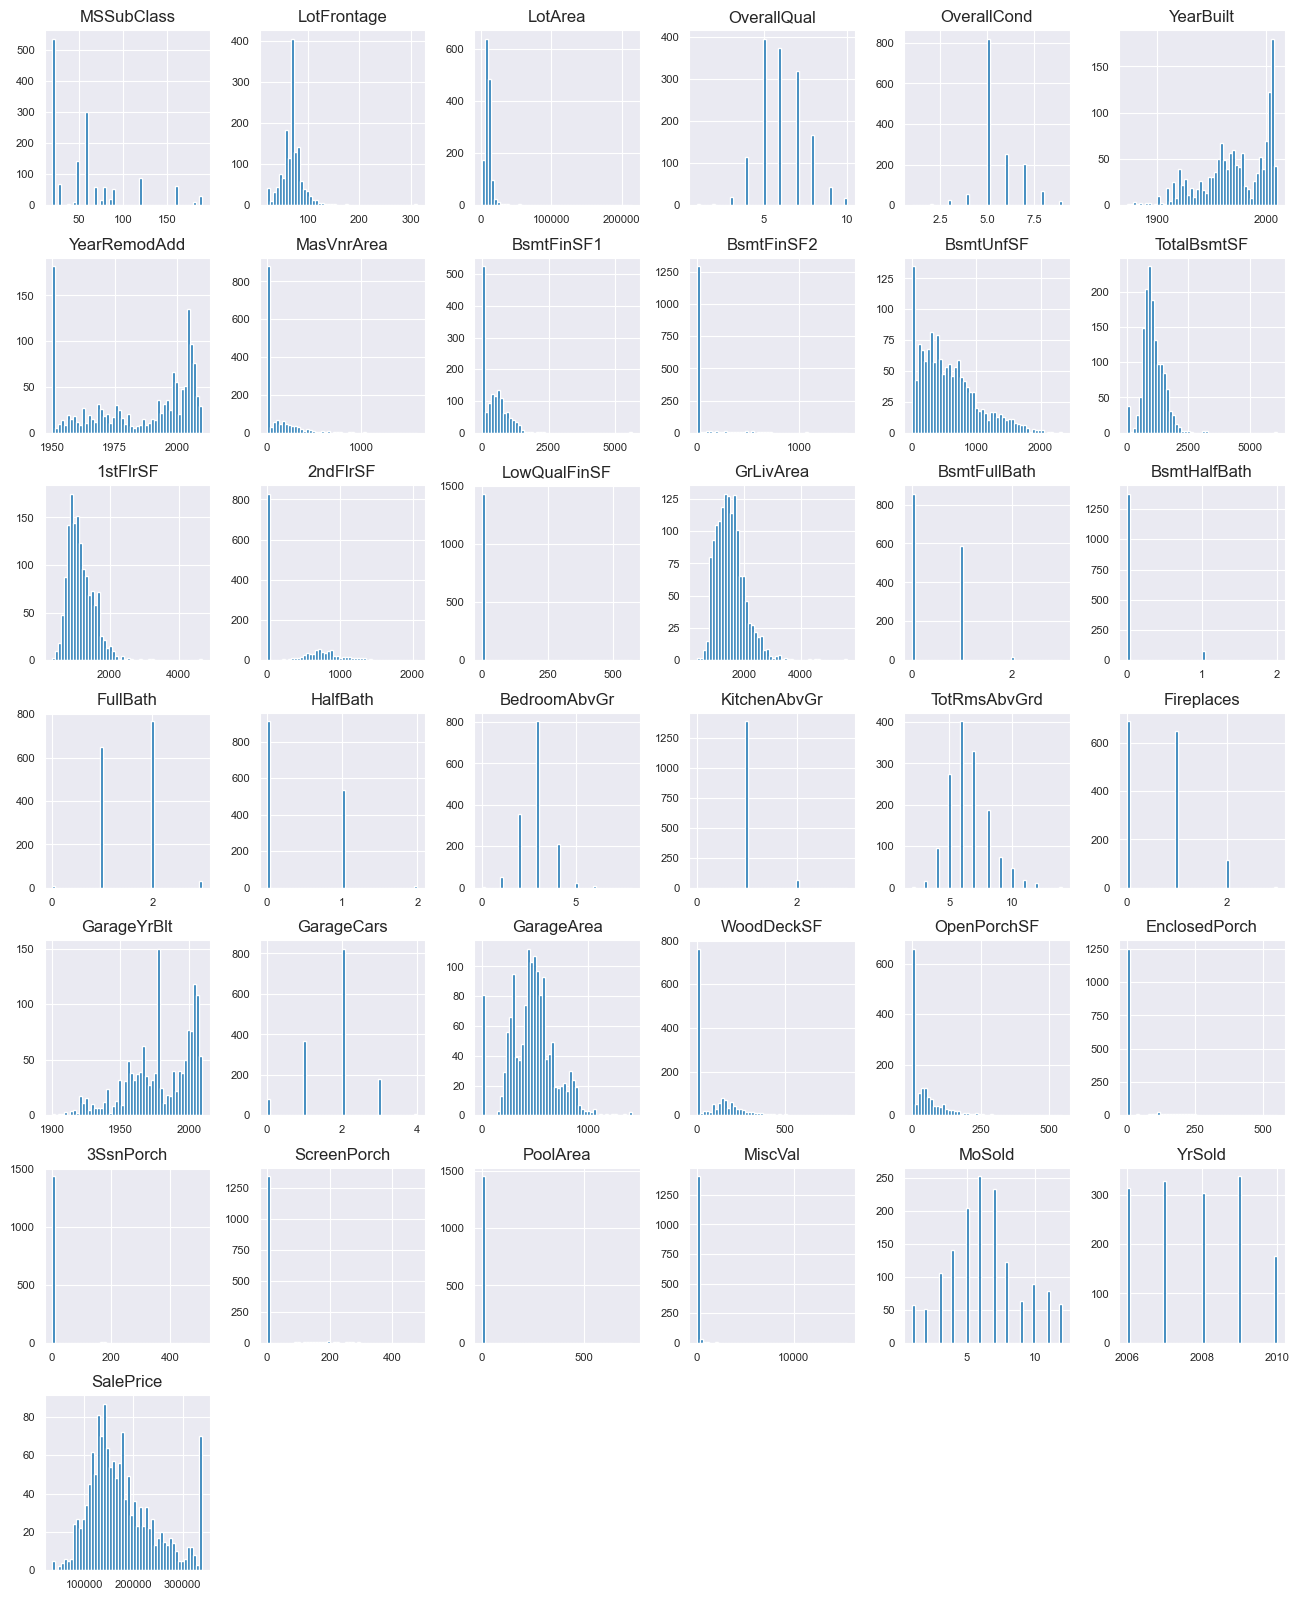

In [40]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [20]:
# What is the distribution of house prices in the dataset?
px.histogram(df,x="SalePrice",title="Distribution of House Prices",opacity=0.8,
                 labels={"SalePrice":"Sale Price"},template="plotly_dark")


These are the most important features that influences house prices:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


C:\Users\ssbgt\AppData\Local\Temp\ipykernel_19916\2217938500.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

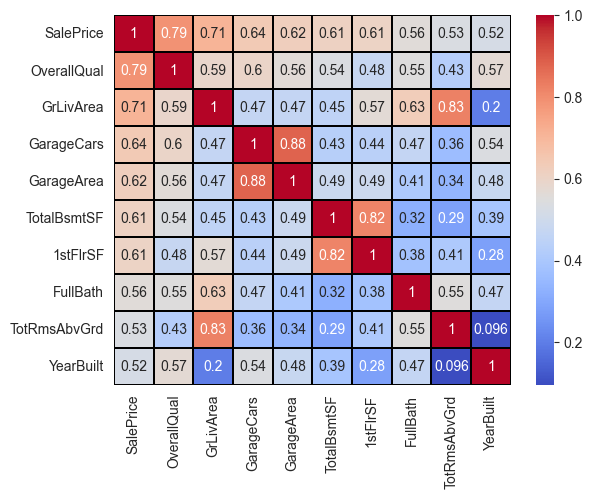

In [21]:
#What are the most important features that influence house prices?
a=df.corr()["SalePrice"].sort_values(ascending=False).head(10)

print("These are the most important features that influences house prices:\n",a)

sns.set_style("darkgrid")
sns.heatmap(df[a.index].corr(),annot=True,cmap="coolwarm",linewidths=0.2,linecolor="black")



In [25]:
#Outliers detection:
df_sales=df["SalePrice"]
px.box(df,x="SalePrice",title="Outliers Detection",template="plotly_dark")



In [26]:
#Outliers detection with IQR:

Q1=df_sales.quantile(0.25)
Q3=df_sales.quantile(0.75)
IQR=Q3-Q1 #interquartile range
Q1,Q3,IQR

(129975.0, 214000.0, 84025.0)

In [27]:
# finding the lower and upper limits for sale price:

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

lower_limit,upper_limit

(3937.5, 340037.5)

In [28]:
#number of outliers in sales price:
((df_sales>upper_limit) | (df_sales<lower_limit)).sum() 

61

In [35]:
#3.backward and forward filling:

outlier_lw=(df_sales<lower_limit)
outlier_upp=(df_sales>upper_limit)

df_sales[outlier_lw]=lower_limit
df_sales[outlier_lw]

df_sales[outlier_upp]=upper_limit
df_sales[outlier_upp]

px.box(df,x="SalePrice",title="Outliers Detection",template="plotly_dark")


In [ ]:
#conclusion EDA:
#1. The dataset has 1460 rows and 81 columns.
#2. The dataset has 2 data types: float64(3), int64(35), object(43).
#3. The dataset has 19 columns with missing values.
#4. The dataset has 3 duplicate rows.
#5. The dataset has 1 constant column.
#6. The dataset has 1 column with a high cardinality (43).
#7. The dataset has 1 column with a high correlation (GarageArea).
#8. The dataset has 1 column with a high missing rate (PoolQC).

In [3]:
# detailed report of the dataset:
df=pd.read_csv(r"house_price.csv") 
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Data_Profiling_v1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
#Building a model to predict the house prices:


# removing the colums which has object data type:
from sklearn.model_selection import train_test_split
numerical_cols  = df.select_dtypes(include=['int64','float64'])
numerical_cols.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [54]:
#choosing the model:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

X=numerical_cols.drop(["SalePrice"],axis=1)
y=df["SalePrice"]

# prepare models
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

# evaluate each model in turn
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 27531.1526 (LR) 
RMSE: 37621.9263 (KNN) 
RMSE: 34035.8509 (CART) 
RMSE: 22973.7327 (RF) 
RMSE: 21302.9745 (GBM) 
RMSE: 23561.4232 (XGBoost) 


In [45]:
#building a Gradient Boosting Regressor model:
# I have chosen this model because it has the lowest RMSE score.


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [49]:
#predicting the house prices:
y_pred=gb.predict(X_test)
print("Predicted House Prices:\n",y_pred[0:20])
print("Actual House Prices:\n",y_test[0:20])

Predicted House Prices:
 [141148.31867457 314422.45378327 123878.56346128 159682.45795762
 290610.52863248  80450.44148212 220994.1813402  146155.33059508
  79988.14552526 133091.51980953 151914.92425357 123911.73659702
 104117.09265119 197282.36405401 173155.24279603 137778.72885142
 189945.81034658 136232.47019491 119062.27512694 214274.3127622 ]
Actual House Prices:
 892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
614      75500.0
218     311500.0
1160    146000.0
649      84500.0
887     135500.0
576     145000.0
1252    130000.0
1061     81000.0
567     214000.0
1108    181000.0
1113    134500.0
168     183500.0
1102    135000.0
1120    118400.0
67      226000.0
Name: SalePrice, dtype: float64


In [50]:
#evaluating the model:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))



Mean Squared Error: 439771701.2180428
R2 Score: 0.9051882900666058
Mean Absolute Error: 14988.573851867968


In [53]:
#Visualizing the model performance:
#1. Scatter plot between the actual and predicted values:
snc=px.scatter(x=y_test,y=y_pred,title="Scatter Plot between the Actual and Predicted Values",
               labels={"x":"Actual Values","y":"Predicted Values"},template="plotly_dark")
snc